In [1]:
#importing necessarry libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **1. Read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv**

In [2]:
#Reading the dataset
data  = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')


# 2.Perform exploratory data analysis

In [3]:
#check data types of all columns
print(data.dtypes)

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object


In [4]:
#Brief summary of dataset
print(data.describe())

         DYRK1A_N     ITSN1_N      BDNF_N       NR1_N      NR2A_N      pAKT_N  \
count  762.000000  762.000000  762.000000  762.000000  762.000000  762.000000   
mean     0.437715    0.629456    0.319844    2.311905    3.882665    0.232722   
std      0.275175    0.274954    0.046536    0.342923    0.929202    0.039521   
min      0.170634    0.264085    0.194160    1.414914    1.794716    0.063236   
25%      0.294759    0.481011    0.290199    2.069609    3.186726    0.206446   
50%      0.371534    0.569058    0.317696    2.309711    3.800418    0.229032   
75%      0.486749    0.700621    0.346747    2.534053    4.471656    0.255064   
max      2.516367    2.602662    0.497160    3.757641    8.482553    0.434624   

          pBRAF_N   pCAMKII_N     pCREB_N      pELK_N  ...       SHH_N  \
count  762.000000  762.000000  762.000000  762.000000  ...  762.000000   
mean     0.182514    3.513055    0.212083    1.447201  ...    0.226365   
std      0.026548    1.268395    0.031066    0.5

In [5]:
#extracting the dependent variables (y1,y2) and independent variable x
x = data.iloc[:, :-2]
y1 = data.iloc[:,-2:-1].values #for binary class
y2 = data.iloc[:,-1].values #for multi-class

In [6]:
# LabelEncoder encodes target labels with value between 0 and n_classes-1. This transformer is used to encode target values, i.e. y 
# This is done to convert categorical data type into numeric data type because mostly models run on numerical values only
from sklearn.preprocessing import LabelEncoder
le_1= LabelEncoder() #for binary
y1 = le_1.fit_transform(y1)


In [7]:

le_2 = LabelEncoder() #for multi-class
y22 = le_2.fit_transform(y2)


# a.Which variables are usable, and which are not?

In [8]:
# For each column find its data type, no. of unique values and null values
col_lst = []
for col in x.columns.values:
  col_lst.append(col)
  lst_vl = pd.unique(x[col])
  print(col + ' is of type ' + str(x[col].dtype) + ' has ' + str(len(lst_vl)) + ' unique values and ' + str(x[col].isnull().sum()) + ' null values' )

DYRK1A_N is of type float64 has 762 unique values and 0 null values
ITSN1_N is of type float64 has 761 unique values and 0 null values
BDNF_N is of type float64 has 762 unique values and 0 null values
NR1_N is of type float64 has 762 unique values and 0 null values
NR2A_N is of type float64 has 762 unique values and 0 null values
pAKT_N is of type float64 has 762 unique values and 0 null values
pBRAF_N is of type float64 has 760 unique values and 0 null values
pCAMKII_N is of type float64 has 762 unique values and 0 null values
pCREB_N is of type float64 has 762 unique values and 0 null values
pELK_N is of type float64 has 762 unique values and 0 null values
pERK_N is of type float64 has 762 unique values and 0 null values
pJNK_N is of type float64 has 761 unique values and 0 null values
PKCA_N is of type float64 has 762 unique values and 0 null values
pMEK_N is of type float64 has 762 unique values and 0 null values
pNR1_N is of type float64 has 762 unique values and 0 null values
pNR

# 3. Develop a strategy to deal with missing variables. 

In [9]:
#impute the missing variables using multivariate feature imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(x)
x = imp.transform(x)


In [10]:
# scaling the data using standardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x),columns = col_lst)
x

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.239745,0.428489,2.372452,1.471921,2.269552,-0.351734,-0.186528,-0.898820,0.648744,0.595213,...,-1.269701,-1.192868,-1.026373,-1.058433,-0.901764,-0.371984,-0.727673,-1.248514,-1.441819,0.943046
1,0.279648,0.216934,1.976690,1.393675,1.940975,-0.533878,-0.365510,-0.963191,0.479587,0.292333,...,-0.878703,-1.384700,-0.976669,-1.039198,-1.072989,-0.139388,-0.761256,-1.178310,-1.390064,1.144768
2,0.259888,0.366815,2.117287,1.095124,1.873152,-0.600347,-0.256006,-0.970144,0.585066,0.223626,...,-1.106122,-1.326024,-0.991436,-0.924510,-0.991907,-0.232612,-0.762340,-1.215206,-1.455133,1.687436
3,0.015969,-0.045054,0.833934,0.452418,1.181185,-0.249043,-0.228099,-1.073520,-0.163587,0.289803,...,-1.159352,-0.867383,-0.676364,-1.267675,-0.777146,-0.940673,-0.540947,-0.916792,-1.111582,1.016991
4,-0.010091,-0.043766,0.837716,0.157224,0.900303,-0.496664,-0.334981,-1.087947,-0.641792,0.111757,...,-0.702678,-0.958228,-0.687094,-1.160421,-0.801338,-0.258680,-0.683469,-1.067879,-1.085488,1.430089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.158354,-0.020962,-0.070527,-0.606540,-0.611634,0.045756,0.683866,-0.240028,0.313292,-0.447289,...,-0.346465,-0.109373,-0.916630,-0.178772,-0.593806,-0.145392,-0.324987,-0.943333,-0.339080,0.345848
758,-0.130826,0.109601,0.042935,-0.373432,-0.507093,0.096829,0.313293,-0.101537,0.638293,-0.385489,...,-0.563470,-0.210474,-0.934907,-0.269046,-0.875867,-0.085877,-0.269247,-0.866914,-0.210920,0.470936
759,-0.201944,-0.156166,-0.027925,-0.700047,-0.871242,0.681455,0.761884,-0.399737,0.366285,-0.388938,...,-0.510605,0.213444,-0.182602,-0.399556,-0.633493,-0.441216,-0.325553,-0.573401,-0.329708,0.224291
760,-0.262164,-0.208343,-0.469880,-0.895755,-1.183635,0.319300,0.296632,-0.445606,0.174685,-0.528465,...,-0.979130,-0.036733,-0.075136,-0.096908,-0.377361,0.154848,-0.344125,-1.060983,0.070612,0.550098


# 2.b. Are there significant correlations among variables?

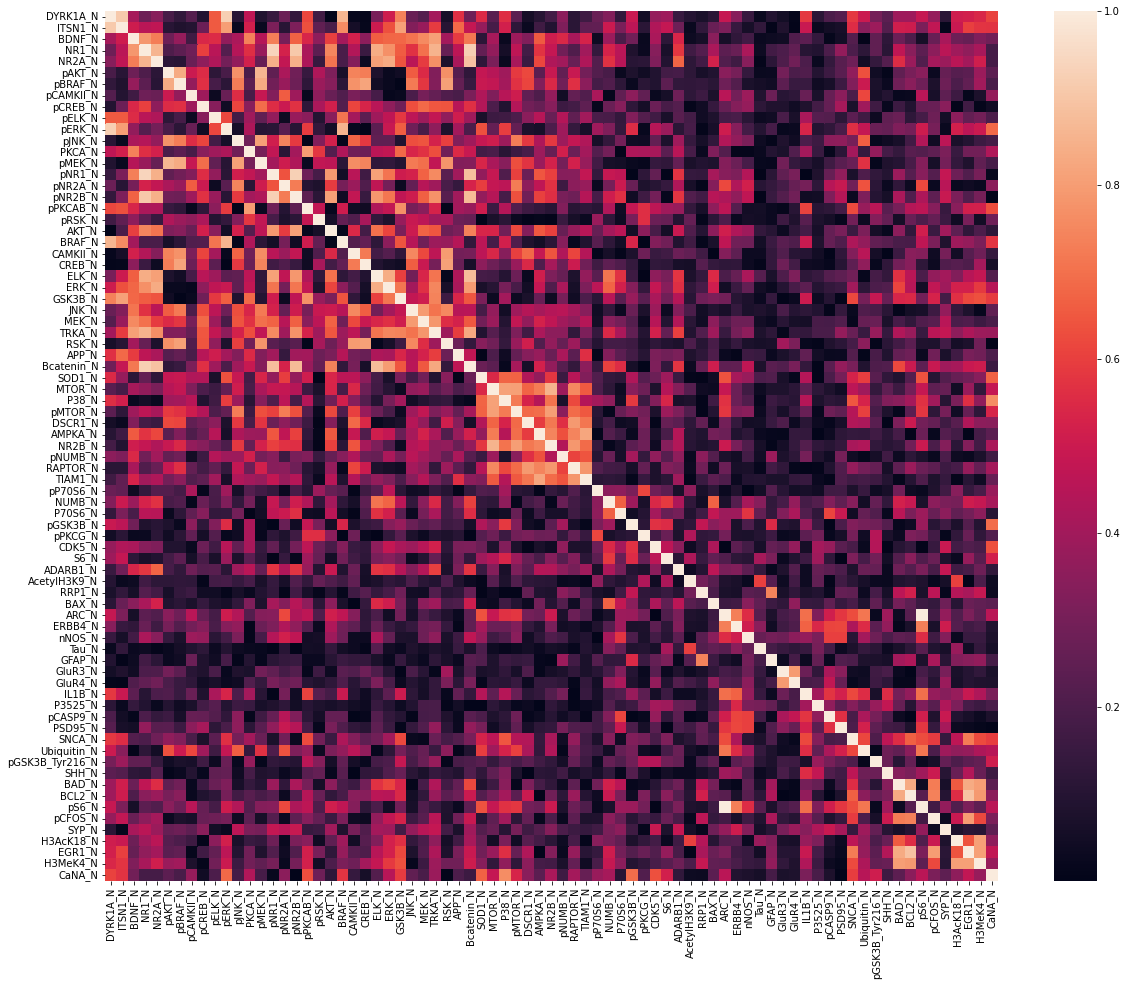

In [11]:
# Plot correlation matrix using spearman method to find correlated variables
# perfect negative correlation is also perfect correlation hence we will plot for absolute values
cor_matrix = x.corr(method = 'spearman').abs()
fig, ax  = plt.subplots(figsize = (20,16))
sns.heatmap(cor_matrix,annot = False)
plt.show()



# Observation:

White toned pixels are highly correlated so we have to drop them (except diagonal)

In [12]:
# Print list of columns to be dropped having more than 90% correlation
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
    
print(to_drop)

['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'Bcatenin_N', 'pS6_N']


# 2.c. Are the classes balanced?

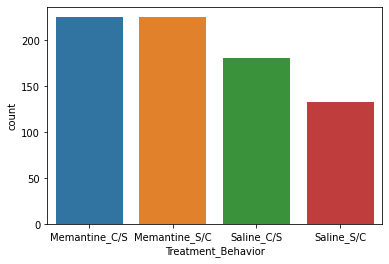

In [13]:
#Plotting the count plot to visualise whether classes are balanced or not
g = sns.countplot(data['Treatment_Behavior'])

g.set_xticklabels(['Memantine_C/S' ,'Memantine_S/C' ,'Saline_C/S' ,'Saline_S/C'])

plt.show()

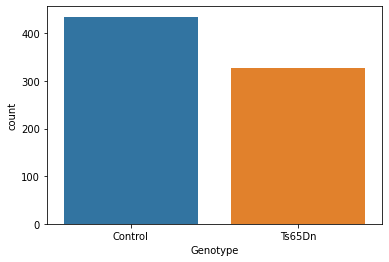

In [14]:
g = sns.countplot(data['Genotype'])

g.set_xticklabels(['Control','Ts65Dn'])

plt.show()

## **Observation:**

As we can see there is almost equal distribution and no biasing in different classes , hence classes are balanced (for both i.e. binary and multi-class)

In [15]:
# drop highly correlated columns and create new list of desired columns
xd = x.drop(to_drop,axis = 1)


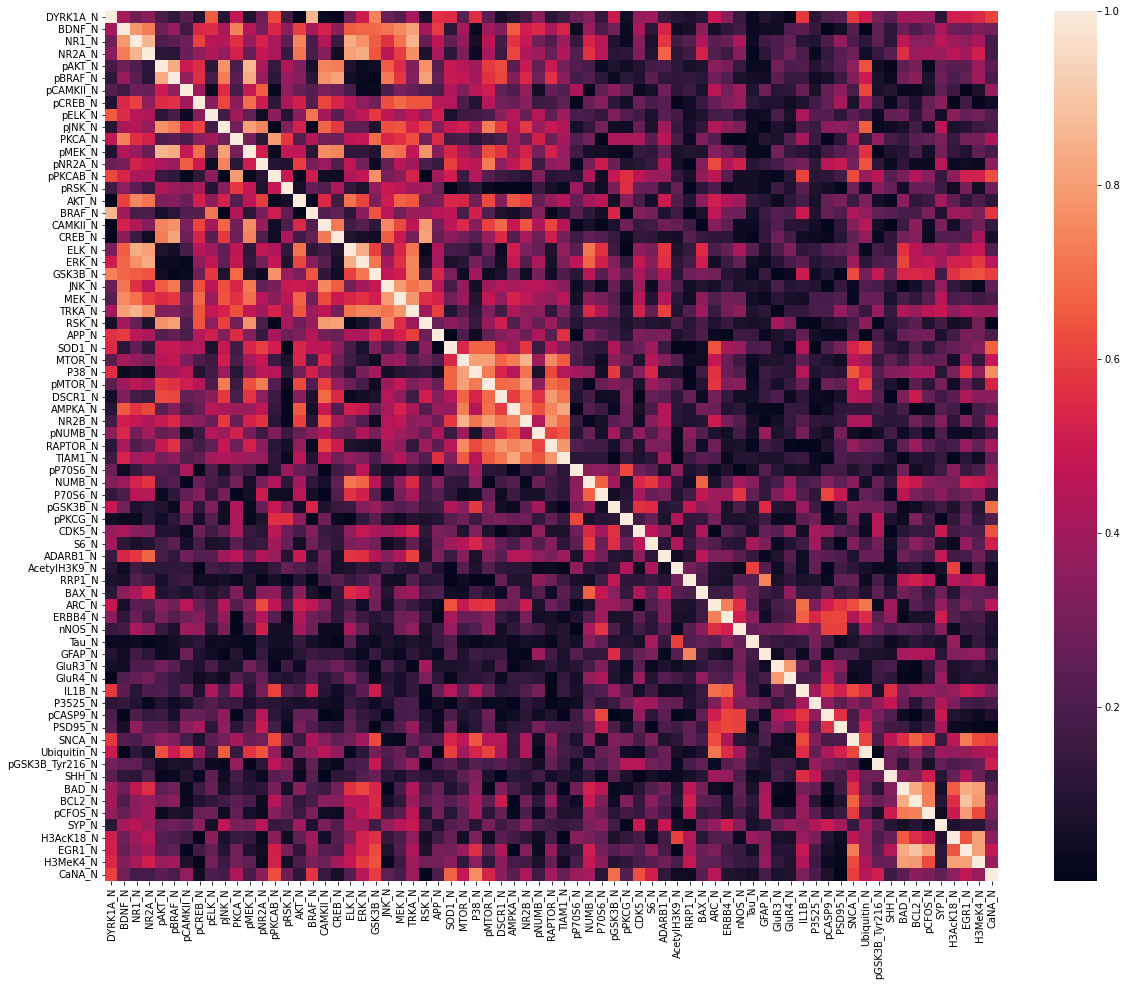

In [16]:


# Again visualise the correlation matrix to see if any highly correlated variable remaining
corrmat = xd.corr(method = 'spearman')
fig, ax  = plt.subplots(figsize = (20,16))
sns.heatmap(abs(corrmat),annot = False)
plt.show()

**Observation**

Since most of the data is very less correlated hence we are ready for further processing

# 4. Select metrices that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc.

Accuracy, confusion matrix and AUC-ROC are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems.

**Accuracy** - Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.
**But this metrix is only good for balanced dataset**

**A confusion matrix**

It is defined as the table that is often used to describe the performance of a classification model on a set of the test data for which the true values are known. **By using confusion matrix we can calculate precision recall and F1 score**

 **AUC-ROC** — The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values.
 
**For binary class we will use balanced accuracy (mean of sensitivity and specificity), F1 score and ROC-AUC score because our classes are balanced.**

**For multi-class when we use one over rest method then our true negatives will increase so we can't use the balanced accuracy method therefore we will use another matrix i.e. micro or macro averages of F1 score**




# 5.Using five-fold cross-validation find the reasonable  hyper-parameter settings for the different model types:

In [17]:
#importing necessarry libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# a.Elastic net logistic regression (L1 and L2 weight)

In [18]:
# Resonable hyper-parameters for binary classification using Elastic net logistic regression (L1 and L2 weight)
#GridSearch helps to loop through predefined hyperparameters and fit our estimator (model) on our training set
hyper = {'penalty':['elasticnet'],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_iter':[80,100,120]}
lg = LogisticRegression(solver = 'saga')
scoring = ['balanced_accuracy','f1','roc_auc']
for i in scoring:
  clf = GridSearchCV(estimator = lg,param_grid=hyper,scoring = i,cv=5) #using 5 fold cross validation
  clf.fit(np.array(xd),np.squeeze(y1))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))


Best param
{'l1_ratio': 0.9, 'max_iter': 80, 'penalty': 'elasticnet'}
best balanced_accuracy:0.7795788119926051
Best param
{'l1_ratio': 0.9, 'max_iter': 80, 'penalty': 'elasticnet'}
best f1:0.7524295359554174
Best param
{'l1_ratio': 0.8, 'max_iter': 80, 'penalty': 'elasticnet'}
best roc_auc:0.8180521394314498


In [19]:
# Resonable hyper-parameters for multi-class classification using Elastic net logistic regression (L1 and L2 weight)
hyper = {'penalty':['elasticnet'],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_iter':[80,100,120]}
lg = LogisticRegression(multi_class='multinomial',solver = 'saga')
scoring = ['f1_macro','roc_auc_ovr']
for i in scoring:
  clf = GridSearchCV(estimator = lg,param_grid=hyper,scoring = i)
  clf.fit(np.array(xd),np.squeeze(y22))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}
best f1_macro:0.7205947601683491
Best param
{'l1_ratio': 0.1, 'max_iter': 80, 'penalty': 'elasticnet'}
best roc_auc_ovr:0.9080299762368862


# b.Neural network

In [20]:
# Resonable hyper-parameters for binary classification using Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight decay)
from sklearn.neural_network import MLPClassifier
mod = MLPClassifier(activation='relu') #‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
param = {'alpha':[0.001, 0.01, 0.1,1,10],'hidden_layer_sizes':[(10,),(15,),(20,),(30,),(50,)]} #In hidden layer sizes the ith element represents the number of neurons in ith hidden layer
scoring = ['balanced_accuracy','f1','roc_auc']
for i in scoring:
  clf = GridSearchCV(estimator = mod,param_grid=param,scoring = i)
  clf.fit(np.array(xd),np.squeeze(y1))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))


Best param
{'alpha': 1, 'hidden_layer_sizes': (50,)}
best balanced_accuracy:0.7538726790450928
Best param
{'alpha': 1, 'hidden_layer_sizes': (15,)}
best f1:0.7195366136211205
Best param
{'alpha': 1, 'hidden_layer_sizes': (50,)}
best roc_auc:0.7972429868981593


In [21]:
# Resonable hyper-parameters for multi-class classification using Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight decay)
scoring = ['f1_macro','roc_auc_ovr']
for i in scoring:
  clf = GridSearchCV(estimator = mod,param_grid=param,scoring = i)
  clf.fit(np.array(xd),np.squeeze(y22))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'alpha': 0.01, 'hidden_layer_sizes': (20,)}
best f1_macro:0.7224791991628786
Best param
{'alpha': 0.01, 'hidden_layer_sizes': (10,)}
best roc_auc_ovr:0.916462247790219


# ** c. Using SVM**

The objective is to find a hyperplane that maximizes the separation of the data points to their potential classes in an n-dimensional space.


# Resonable hyper-parameters for binary classification using SVM

In [22]:
hyper = {'kernel':('rbf','linear','poly'),'C':[.001,.01,1,10],'degree':[2,3,5,8]}
svc = svm.SVC(probability=True)
scoring = ['balanced_accuracy','f1','roc_auc']
for i in scoring:
  clf = GridSearchCV(estimator = svc,param_grid=hyper,scoring = i)
  clf.fit(np.array(xd),np.squeeze(y1))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))


Best param
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}
best balanced_accuracy:0.7943533478016236
Best param
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}
best f1:0.7627587395089508
Best param
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}
best roc_auc:0.8491230608471987


# Resonable hyper-parameters for Multi-class classification using SVM

For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems.

In [23]:
scoring = ['f1_macro','roc_auc_ovr']
for i in scoring:
  clf = GridSearchCV(estimator = svc,param_grid=hyper,scoring = i)
  clf.fit(np.array(xd),y22)
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'C': 1, 'degree': 2, 'kernel': 'linear'}
best f1_macro:0.7386774372767196
Best param
{'C': 1, 'degree': 3, 'kernel': 'linear'}
best roc_auc_ovr:0.9096012699357805


# Resonable hyper-parameters for binary classification using Random forest

It is basically collection of random trees and it rectifies some of the limitations of decision tree

It builds decision trees on different samples and takes their majority vote for classification.


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scoring = ['balanced_accuracy','f1','roc_auc']

# declaring all the parameters i.e. number of trees, max tree depth, max number of variables per node
param_grid = {
    'max_depth': [2,4,6,8,10],
    'max_features':['auto','sqrt','log2'],
    'n_estimators': [10, 20, 50,100,200]
}
for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param_grid,scoring = i, 
                          cv = 5, n_jobs = -1, verbose = 2)

  clf.fit(np.array(xd),np.squeeze(y1))
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 20}
best balanced_accuracy:0.672562494976288
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
best f1:0.6092759483987488
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}
best roc_auc:0.7424156686225653


# Resonable hyper-parameters for multi-class classification using Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scoring = ['f1_macro','roc_auc_ovr']

param_grid = {
    'max_depth': [2,4,6,8,10],
    'max_features':['auto','sqrt','log2'],
    'n_estimators': [10, 20, 50,100,200]
}
for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param_grid,scoring = i, 
                          cv = 5, n_jobs = -1, verbose = 2)

  clf.fit(np.array(xd),np.squeeze(y22))
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 20}
best f1_macro:0.695295153592259
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
best roc_auc_ovr:0.8952350763183693


# 6.Check feature importance for each model to see if the same proteins are important for each model.

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. 

The RFECV is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the “min_features_to_select” argument (defaults to 1) and we can also specify the type of cross-validation and scoring to use via the “cv” (defaults to 5) and “scoring” arguments (uses accuracy for classification).

In [26]:
from sklearn.feature_selection import RFECV #Here we are using SVM estimator with linear kernel for binary classification
svc = svm.SVC(kernel = 'linear')
svc.fit(xd,y1)
selector = RFECV(estimator = svc, step=1, cv=2)
selector = selector.fit(xd, y1)
z = selector.ranking_ #here we can see the ranking of features that are helpful in predicting the target
print("Ranking of features\n",z)

Ranking of features
 [ 6 46  3 27 23 50 17 31 58 25 33 66 24 65 35 29  7 32 16 28  1 48 51 42
  2 22  1 49  5 39 37 10  1 62  4 20  1 21  1 26 60 14 44 45 30 55 64 52
 59  8 53 56 61  1 43 40 41 11 47 15 19 13 57 63 38 18  9 54 36 34 12]


**Checking how many features will contribute to the target variable by plotting**

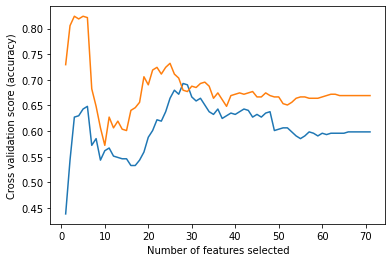

In [27]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),
    selector.grid_scores_,
)
plt.show()

**Observation:**

We can see with 8 features we can achieve 85% (approx.) accuracy 

In [28]:
q = selector.feature_names_in_


In [29]:
res = dict(zip(q,z)) #Here we are mmaking dictionary with key as features and their values as their corresponding ranking
col_1 = []

for i,j in res.items():
  if j<=8:
    col_1.append(i)
col_1                #Here column 1 is the list of all the selected features with ranking <=8



['DYRK1A_N',
 'NR1_N',
 'BRAF_N',
 'ERK_N',
 'TRKA_N',
 'APP_N',
 'MTOR_N',
 'AMPKA_N',
 'pNUMB_N',
 'TIAM1_N',
 'NUMB_N',
 'ERBB4_N',
 'GluR3_N']

In [30]:
x1 = pd.DataFrame(xd,columns=col_1 )


In [31]:
from sklearn.feature_selection import RFECV #Here we are using SVM estimator with linear kernel for multi-class classification
svc = svm.SVC(kernel = 'linear')
svc.fit(xd,y22)
selector = RFECV(estimator = svc, step=1, cv=10)
selector = selector.fit(xd, y22)
z = selector.ranking_
z

array([ 6,  5,  1,  1, 26,  2,  1,  1, 30,  1, 18, 33,  1,  1, 39,  1,  1,
        1, 25, 16,  1,  1, 29, 10,  1, 23,  1,  1,  8,  1, 14,  1, 31, 38,
        1, 19, 12, 27, 21,  9, 34,  3,  1,  1, 15, 11, 17,  7, 20, 28,  1,
        1,  1,  1, 24,  1,  1,  1, 35, 13,  1,  1,  4, 41, 22, 36, 40, 37,
       42, 32,  1])

In [32]:
res = dict(zip(q,z)) 
col_2 = []

for i,j in res.items():
  if j<=8:
    col_2.append(i)
col_2   

['DYRK1A_N',
 'BDNF_N',
 'NR1_N',
 'NR2A_N',
 'pBRAF_N',
 'pCAMKII_N',
 'pCREB_N',
 'pJNK_N',
 'pNR2A_N',
 'pPKCAB_N',
 'AKT_N',
 'BRAF_N',
 'CAMKII_N',
 'ERK_N',
 'GSK3B_N',
 'TRKA_N',
 'APP_N',
 'SOD1_N',
 'MTOR_N',
 'P38_N',
 'DSCR1_N',
 'pNUMB_N',
 'pPKCG_N',
 'CDK5_N',
 'S6_N',
 'BAX_N',
 'nNOS_N',
 'Tau_N',
 'GFAP_N',
 'GluR3_N',
 'IL1B_N',
 'P3525_N',
 'pCASP9_N',
 'Ubiquitin_N',
 'pGSK3B_Tyr216_N',
 'SHH_N',
 'CaNA_N']

In [33]:
x2 = pd.DataFrame(xd,columns=col_2)

Checking how many features will contribute to the target variable by plotting

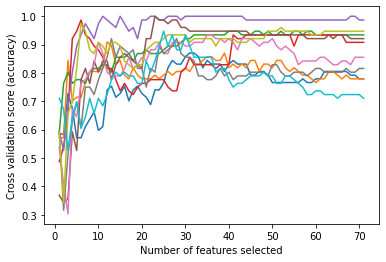

In [34]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),
    selector.grid_scores_,
)
plt.show()

**Observation:**

We can see with 8 features we can achieve 95% (approx.) accuracy 

# 7.See if removing some features systematically will improve your models (e.g. using recursive feature elimination

In [35]:
hyper = {'kernel':('rbf','linear','poly'),'C':[.001,.01,1,10],'degree':[2,3,5,8]} #using SVM for binary
svc = svm.SVC(probability=True)
scoring = ['balanced_accuracy','f1','roc_auc']

#x = x['ELK_N','ERK_N']
for i in scoring:
  clf = GridSearchCV(estimator = svc,param_grid=hyper,scoring = i)
  clf.fit(np.array(x1),np.squeeze(y1))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'C': 1, 'degree': 2, 'kernel': 'linear'}
best balanced_accuracy:0.8790515231894542
Best param
{'C': 1, 'degree': 2, 'kernel': 'linear'}
best f1:0.8619461015052112
Best param
{'C': 1, 'degree': 2, 'kernel': 'linear'}
best roc_auc:0.9550625619591135


In [36]:
scoring = ['f1_macro','roc_auc_ovr']  #using SVM for multi-class
for i in scoring:
  clf = GridSearchCV(estimator = svc,param_grid=hyper,scoring = i)
  clf.fit(np.array(x2),y22)
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'C': 10, 'degree': 2, 'kernel': 'linear'}
best f1_macro:0.8428961809802145
Best param
{'C': 10, 'degree': 5, 'kernel': 'linear'}
best roc_auc_ovr:0.9544912997523822


In [37]:
hyper = {'penalty':['elasticnet'],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_iter':[80,100,120]} #using logistic regression for binary
lg = LogisticRegression(solver = 'saga')
scoring = ['balanced_accuracy','f1','roc_auc']
for i in scoring:
  clf = GridSearchCV(estimator = lg,param_grid=hyper,scoring = i)
  clf.fit(np.array(x1),np.squeeze(y1))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'l1_ratio': 0.1, 'max_iter': 80, 'penalty': 'elasticnet'}
best balanced_accuracy:0.8836259143155696
Best param
{'l1_ratio': 0.1, 'max_iter': 80, 'penalty': 'elasticnet'}
best f1:0.8672689826815126
Best param
{'l1_ratio': 0.1, 'max_iter': 80, 'penalty': 'elasticnet'}
best roc_auc:0.9545990408059375


In [38]:
hyper = {'penalty':['elasticnet'],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_iter':[80,100,120]} #using logistic regression for multi-class 
lg = LogisticRegression(multi_class='multinomial',solver = 'saga')
scoring = ['f1_macro','roc_auc_ovr']
for i in scoring:
  clf = GridSearchCV(estimator = lg,param_grid=hyper,scoring = i)
  clf.fit(np.array(x2),np.squeeze(y22))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'l1_ratio': 0.1, 'max_iter': 120, 'penalty': 'elasticnet'}
best f1_macro:0.7715743998266646
Best param
{'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}
best roc_auc_ovr:0.9285888324222643


In [39]:
from sklearn.neural_network import MLPClassifier  #using neural network for binary
mod = MLPClassifier()
param = {'alpha':[0.001, 0.01, 0.1,1,10],'hidden_layer_sizes':[(10,),(15,),(20,),(30,),(50,)]}
scoring = ['balanced_accuracy','f1','roc_auc']
for i in scoring:
  clf = GridSearchCV(estimator = mod,param_grid=param,scoring = i)
  clf.fit(np.array(x1),np.squeeze(y1))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'alpha': 0.001, 'hidden_layer_sizes': (10,)}
best balanced_accuracy:0.9104059159231573
Best param
{'alpha': 0.01, 'hidden_layer_sizes': (15,)}
best f1:0.8936719251336898
Best param
{'alpha': 0.001, 'hidden_layer_sizes': (15,)}
best roc_auc:0.9667454384695764


In [40]:
scoring = ['f1_macro','roc_auc_ovr']  #using neural network for multi-class
for i in scoring:
  clf = GridSearchCV(estimator = mod,param_grid=param,scoring = i)
  clf.fit(np.array(x2),np.squeeze(y22))
  print('Best param')
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Best param
{'alpha': 1, 'hidden_layer_sizes': (50,)}
best f1_macro:0.7669548252289864
Best param
{'alpha': 0.01, 'hidden_layer_sizes': (10,)}
best roc_auc_ovr:0.9298032691822751


In [41]:
rf = RandomForestClassifier() #using random forest for binary
scoring = ['balanced_accuracy','f1','roc_auc']


param_grid = {
    'max_depth': [2,4,6,8,10],
    'max_features':['auto','sqrt','log2'],
    'n_estimators': [10, 20, 50,100,200]
}
for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param_grid,scoring = i, 
                          cv = 5, n_jobs = -1, verbose = 2)

  clf.fit(np.array(x1),np.squeeze(y1))
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
best balanced_accuracy:0.8069021782814886
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
best f1:0.7671839961367104
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
best roc_auc:0.8748637569327224


In [42]:
rf = RandomForestClassifier()  #using random forest for multiclass
scoring = ['f1_macro','roc_auc_ovr']


param_grid = {
    'max_depth': [2,4,6,8,10],
    'max_features':['auto','sqrt','log2'],
    'n_estimators': [10, 20, 50,100,200]
}
for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param_grid,scoring = i, 
                          cv = 5, n_jobs = -1, verbose = 2)

  clf.fit(np.array(x2),np.squeeze(y22))
  print(clf.best_params_)
  print('best ' + i+ ':' + str(clf.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
best f1_macro:0.7029123977635783
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}
best roc_auc_ovr:0.9143800506290101


**Observation**


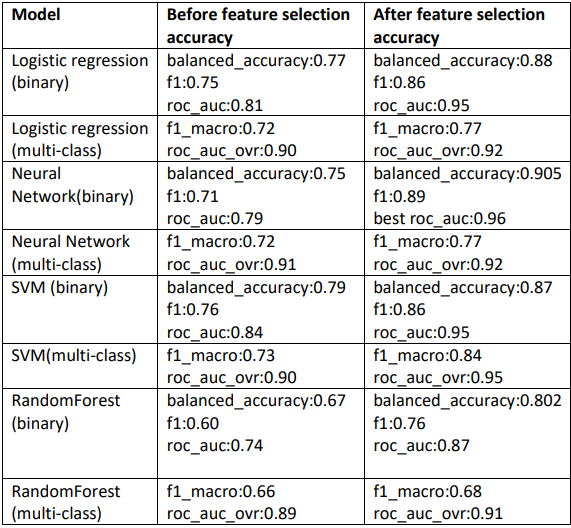

 **Here we can see that after feature selection the accuracy has increased in all the models**

# 8.Finally, test a few promising models on the test data:

In [43]:
test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv') #reading test data
test_x = test.iloc[:, :-2]
test_y = test.iloc[:,-2:].values

ty1 = test_y[:,:-1] #for binary
ty2 = test_y[:,-1]  #for multi-class


(225,)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ty1 = le.fit_transform(ty1)

le = LabelEncoder()
ty2 = le.fit_transform(ty2)



In [46]:
test_x = imp.transform(test_x)  #computing NAN values by using the same iterative computing that was used in training data
test_x = pd.DataFrame(scaler.transform(test_x),columns = col_lst)   #scaling the test variable by using same scaling factor used in training data
test_x1 = pd.DataFrame(test_x,columns=col_1 ) #features desirable for binary targets
test_x2 = pd.DataFrame(test_x,columns=col_2 ) #features desirable for multi-class targets




**Using reasonable hyper-parameters now we are fitting our models**

In [47]:
#fitting SVM model on binary class (due to high accuracy)
from sklearn import svm
svc1 = svm.SVC(kernel = 'linear',C = .01,degree =2)

svc1.fit(np.array(x1),np.squeeze(y1))
y_p1 = svc1.predict(test_x1) #predicted target variables for binary class


In [48]:
y_p1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [49]:
#checking accuracy of model on test data
from sklearn.metrics import f1_score
f1 = f1_score(y_p1, ty1)
print('f1: %.2f' % (f1*100))
roc = roc_auc_score(y_p1, ty1)
print('roc: %.2f' % (roc*100)) 

f1: 83.91
roc: 87.42


In [50]:
#fitting SVM model on multi-class (due to high accuracy)
svc = svm.SVC(kernel = 'linear',C = 10,degree = 2,probability=True)
svc.fit(np.array(x2),np.squeeze(y22))
y_p2 = svc.predict(test_x2) #predicted target variables for multi-class
y_pred_2 = svc.predict_proba(test_x2) # predicting probability of multiclass-data for roc_auc score


In [51]:
y_p2

array([2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [52]:
#checking accuracy of model on test data
from sklearn.metrics import f1_score
accuracy = f1_score(y_p2, ty2,average='macro')
print('f1_macro: %.2f' % (accuracy*100))
roc = roc_auc_score((ty2), y_pred_2, average='macro', multi_class='ovr') # Calculating accuracy
print('\n roc: ', roc*100)


f1_macro: 94.31

 roc:  98.90432098765432


In [53]:
#fitting neural network model on binary class
mod1 = MLPClassifier(alpha = .001,hidden_layer_sizes=(15,))
mod1.fit(np.array(x1),np.squeeze(y1))
y_p11 = mod1.predict(test_x1) #predicted target variables for binary clas

In [54]:
y_p11

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [55]:
f1 = f1_score(y_p11, ty1)
print('f1: %.2f' % (f1*100))
roc = roc_auc_score(y_p11, ty1)
print('roc: %.2f' % (roc*100)) 

f1: 81.68
roc: 83.78


In [56]:
#fitting neural network model on multi-class
mod2 = MLPClassifier(alpha = 1,hidden_layer_sizes=(20,))
mod1.fit(np.array(x2),np.squeeze(y22))
y_p22 = mod1.predict(test_x2) #predicted target variables for multiclass
y_pred22= mod1.predict_proba(test_x2) #predicting probability

In [57]:
#checking accuracy of model on test data
from sklearn.metrics import f1_score
accuracy = f1_score(y_p22, ty2,average='macro')
print('f1_macro: %.2f' % (accuracy*100))

roc = roc_auc_score((ty2), y_pred22, average='macro', multi_class='ovr') # Calculating accuracy
print('\n roc: ', roc*100)


f1_macro: 89.61

 roc:  99.08361391694726


**Observation:**

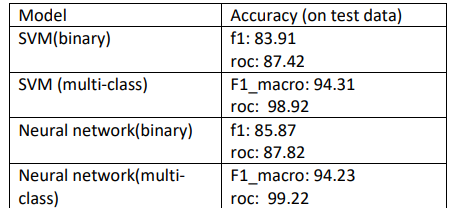

Here we can see that our models are giving good accuracy on test data hence we can conclude that among all the models these two i.e. SVM and neural network are best for binary and multi-class classification


# 9.Write your observations and thoughts
1.We started our analysis by exploratory data analysis i.e. imputing and scaling, then we removed the correlated variables.

2.After that we calculated reasonable hyper-parameters for various models for binary and multi-class classification.

3.After this we checked our model's accuracy after feature selection and we found that for all the models accuracy has increased after feature selection

4.Finally we tested our two of the models (i.e. Neural network and SVM) on test data and it provided pretty good accuracy (more than 80%) for both binary and multi-class classification





**Conclusion:**
While dealing with data it's necessarry to remove undesirable and also replace missing variable and our final accuracy depends totally on the hyper-parameters
and error matrices we are choosing for our model therefore we need to be very cautious while selecting them for our model

# 10.Write your references as well as other classmates outside of your team with whom you discussed

**References:**

https://scikit-learn.org/stable/index.html

https://www.datascienceblog.net/post/machine-learning/performance-measures-multi-class-problems/

https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/#:~:text=Accuracy%2C%20confusion%20matrix%2C%20log%2D,used%20metrics%20for%20classification%20problems

https://www.youtube.com/watch?v=Ato-hcv0NK0&t=2s

https://stackoverflow.com/

https://www.baeldung.com/cs/svm-multiclass-classification

https://towardsdatascience.com/

Discussed with TA Mriganka Shrivastava only